### Import the necessary package

In [1]:
# package to get the custom modules
import sys
sys.path.insert(0, '../')
# package for handling files
import os
# package for handling the environment variables
from dotenv import load_dotenv
# package for handling the random values
from random import randint
# package for handling metadata
import pandas as pd
# a custom modules for handling the data
import utilities as utils
# package for handling the visualization
import matplotlib.pyplot as plt

# load the environment variables
load_dotenv()

c:\Users\Acer\miniconda3\envs\tf-gpu\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Users\Acer\miniconda3\envs\tf-gpu\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If 

True

### Global variables

In [2]:
# store the path
path_full = os.environ.get("ORI_PATH")
path_mask = os.path.join(path_full, "datasets", "cleaned", "mask_image")
path_data = os.path.join(path_full, "data")

### Get the mask image list and information

In [3]:
# get the list of mask images
mask_images = os.listdir(path_mask)
cdr_data = pd.DataFrame(data=mask_images, columns=["id"])

# extract the information from the file name
cdr_data["path"] = cdr_data["id"].apply(lambda x: os.path.join(path_mask, x))
cdr_data["id"] = cdr_data["id"].apply(lambda x: x.split(".")[0])
cdr_data["label"] = cdr_data["id"].apply(lambda x: x.split("_")[1])
cdr_data["eye_side"] = cdr_data["id"].apply(lambda x: x.split("_")[3])

# show the data
cdr_data.drop(columns=['path']).head(5)

,id,label,eye_side
0,fff_0_111784_l_y_mask,0,l
1,fff_0_111784_r_y_mask,0,r
2,fff_0_113060_l_1_mask,0,l
3,fff_0_113060_l_2_mask,0,l
4,fff_0_113060_l_3_mask,0,l


### Visualize the mask image

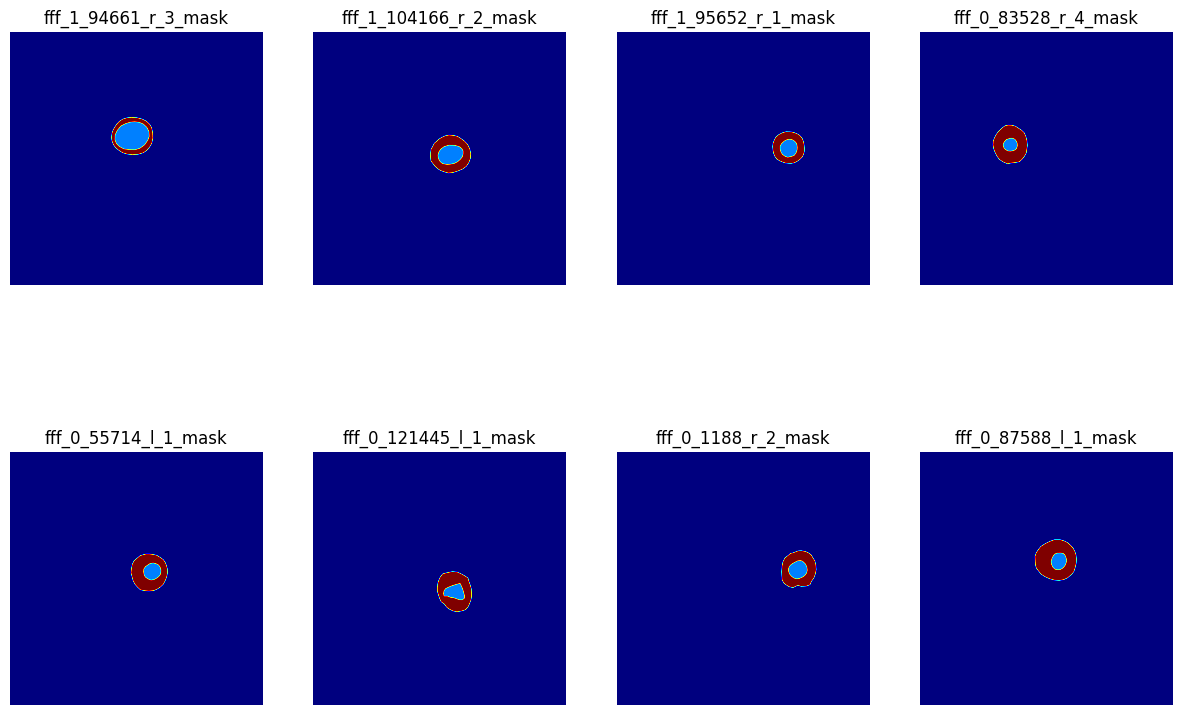

In [4]:
# configure the visualizations
plt.figure(figsize=(15, 10))
fig_rows = 2
fig_cols = 4
# plot the images
for i in range(fig_rows * fig_cols):
    # get a random mask image
    choice = randint(0, len(cdr_data))
    # plot the mask image
    plt.subplot(fig_rows,fig_cols, i+1)
    plt.imshow(plt.imread(cdr_data["path"][choice]), cmap='jet')
    plt.title(cdr_data["id"][choice])
    plt.axis('off')

### Count CDR

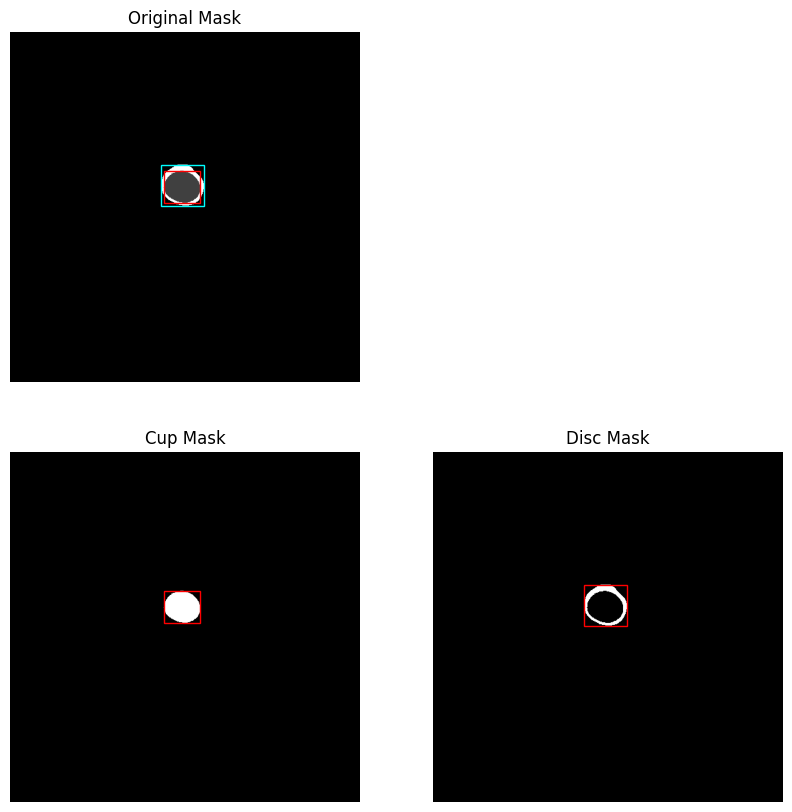

{'Area CDR': 0.6561634349030471, 'Horizontal CDR': 0.8412698412698413, 'Vertical CDR': 0.7833333333333333}


In [5]:
# show the bounding boxes of the mask images
print(utils.count_dataset_cdr(cdr_data['path'][randint(0, len(cdr_data))], True))

In [6]:
# count the CDR values
for mask_row in cdr_data.iterrows():
    cdr = utils.count_dataset_cdr(mask_row[1]['path'])
    cdr_data.loc[mask_row[0], 'a_cdr'] = cdr["Area CDR"]
    cdr_data.loc[mask_row[0], 'v_cdr'] = cdr["Vertical CDR"]
    cdr_data.loc[mask_row[0], 'h_cdr'] = cdr["Horizontal CDR"]

### Save the cdr information to csv file

In [7]:
cdr_data.drop(columns=["path"]).to_csv(os.path.join(path_data, "cdr_dataset.csv"), index=False)